In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px

In [0]:
## Check if any differences
def reduce_mem_usage(df, verbose=True):
    """
    :param df: Dataframe with columns unprocessed so they use more memory than needed
    
    :returns:
        df -> Dataframe with lower memory use
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
confirmed_df = reduce_mem_usage(pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'))
deaths_df = reduce_mem_usage(pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'))
#recoveries_df = reduce_mem_usage(pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'))

Mem. usage decreased to  0.14 Mb (53.1% reduction)
Mem. usage decreased to  0.10 Mb (64.9% reduction)


In [0]:
confirmed_df['Country/Region'] = confirmed_df['Country/Region'].replace('Korea, South', 'South Korea')
deaths_df['Country/Region'] = deaths_df['Country/Region'].replace('Korea, South', 'South Korea')

Confirmed

In [5]:
# Get data of each selected country 
countries = ['Italy', 'Spain', 'Germany',  "US", 'South Korea', 'China','Greece'] 
cases_per_country = {}
for c in countries:
  res = confirmed_df[confirmed_df['Country/Region'] == c]
  cases_per_country[c] = res[res.columns[4:]].values.reshape(-1)
  print (c, cases_per_country[c])

Italy [     0      0      0      0      0      0      0      0      0      2
      2      2      2      2      2      2      3      3      3      3
      3      3      3      3      3      3      3      3      3      3
     20     62    155    229    322    453    655    888   1128   1694
   2036   2502   3089   3858   4636   5883   7375   9172  10149  12462
  15113  17660  21157  24747  27980  31506  35713  41035  47021  53578
  59138  63927  69176  74386  80589  86498  92472  97689 101739 105792
 110574 115242 119827 124632 128948 132547 135586 139422 143626 147577
 152271 156363 159516 162488 165155 168941 172434 175925 178972 181228
 183957 187327 189973 192994 195351 197675 199414 201505 203591 205463
 207428 209328 210717 211938 213013 214457 215858 217185 218268 219070
 219814 221216 222104 223096 223885 224760 225435 225886 226699 227364
 228006 228658 229327 229858 230158 230555 231139 231732 232248 232664
 232997 233197 233515 233836 234013 234531 234801 234998 235278 235561


In [0]:
## Convert number of cases per day into number of days since number of cases=align_by_cases
align_by_cases=100

cases_per_country_aligned = {}
for i,v in cases_per_country.items():
  cases_per_country_aligned[i] = v[v>=align_by_cases]


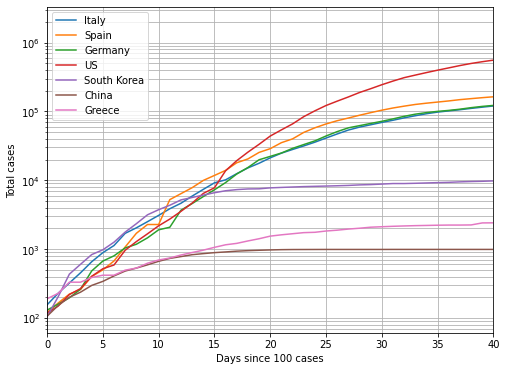

In [7]:
## Plot cases per country aligned of each country in logarithmic y scale
plt.figure(figsize=(8,6))
for i,v in cases_per_country_aligned.items():
  plt.semilogy(v.reshape(-1))

plt.ylabel('Total cases')
plt.xlabel(f'Days since {align_by_cases} cases')
plt.grid('on')
plt.grid(True, which="both")
plt.xlim([0,40])
plt.legend(cases_per_country_aligned)

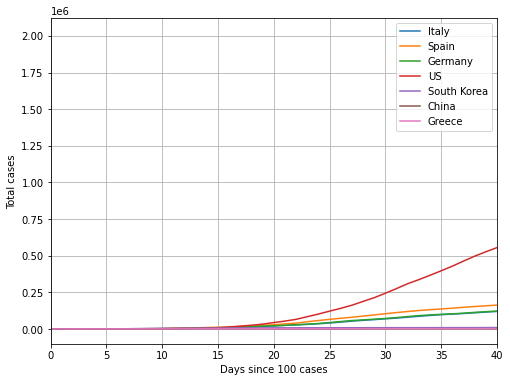

In [8]:
## Plot cases per country aligned of each country in linear y scale
plt.figure(figsize=(8,6))
for i,v in cases_per_country_aligned.items():
  plt.plot(v.reshape(-1))
plt.ylabel('Total cases')
plt.xlabel(f'Days since {align_by_cases} cases')
plt.grid('on')
plt.grid(True, which="both")
plt.xlim([0,40])
plt.legend(cases_per_country_aligned)

Deaths

In [9]:
# Get data of each selected country 
countries = ['Italy', 'Spain', 'Germany',  "US", 'South Korea', 'China', 'Greece'] 
deaths_per_country = {}
for c in countries:
  res = deaths_df[deaths_df['Country/Region'] == c]
  deaths_per_country[c] = res[res.columns[4:]].values.reshape(-1)
  print (c, deaths_per_country[c])

Italy [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     1     2     3     7    10    12
    17    21    29    34    52    79   107   148   197   233   366   463
   631   827  1016  1266  1441  1809  2158  2503  2978  3405  4032  4825
  5476  6077  6820  7503  8215  9134 10023 10779 11591 12428 13155 13915
 14681 15362 15887 16523 17127 17669 18279 18849 19468 19899 20465 21067
 21645 22170 22745 23227 23660 24114 24648 25085 25549 25969 26384 26644
 26977 27359 27682 27967 28236 28710 28884 29079 29315 29684 29958 30201
 30395 30560 30739 30911 31106 31368 31610 31763 31908 32007 32169 32330
 32486 32616 32735 32785 32877 32955 33072 33142 33229 33340 33415 33475
 33530 33601 33689 33774 33846 33899 33964 34043 34114 34167]
Spain [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0  

In [0]:
align_by_deaths=10

deaths_per_country_aligned = {}
for i,v in deaths_per_country.items():
  deaths_per_country_aligned[i] = v[v>=align_by_cases]

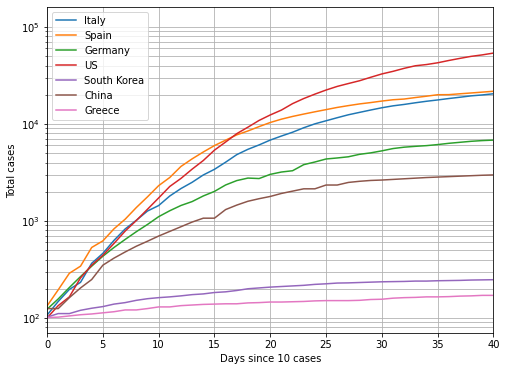

In [11]:
## Plot cases per country aligned of each country in logarithmic y scale
plt.figure(figsize=(8,6))

for i,v in deaths_per_country_aligned.items():
  plt.semilogy(v.reshape(-1))

plt.ylabel('Total cases')
plt.xlabel(f'Days since {align_by_deaths} cases')
plt.grid('on')
plt.grid(True, which="both")
plt.xlim([0,40])
plt.legend(deaths_per_country_aligned)

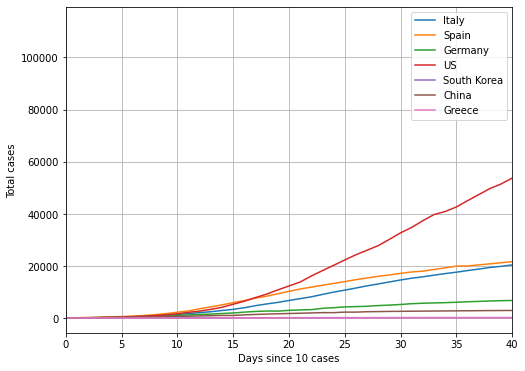

In [12]:
## Plot cases per country aligned of each country in linear y scale
plt.figure(figsize=(8,6))

for i,v in deaths_per_country_aligned.items():
  plt.plot(v.reshape(-1))
plt.ylabel('Total cases')
plt.xlabel(f'Days since {align_by_deaths} cases')
plt.grid('on')
plt.grid(True, which="both")
plt.xlim([0,40])
plt.legend(deaths_per_country_aligned)

CCAA Espanha

In [13]:
ccaa_confirmed = reduce_mem_usage(pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos_long.csv'))

Mem. usage decreased to  0.03 Mb (34.3% reduction)


In [0]:
df1=ccaa_confirmed.query("CCAA!='Total'")

In [15]:
px.line(df1, y='total', x='fecha', color='CCAA', log_y=True)

In [16]:
px.line(df1, y='total', x='fecha', color='CCAA')